# Tarea 2

## Problema 1
### (a) Usando SimPy demostrar que


$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

sabiendo que $J(\beta_0,\beta_1)$ es igual a:

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [81]:
from sympy.interactive import printing

from sympy import *

#Se escribe la función hat{y} en función de Xi
b0, b1=symbols('beta_0 beta_1')
y,i=symbols('y i')
x=Symbol('x')
Y=Function('Y')(Indexed(x,i))
Y

Y(x[i])

In [82]:
#Se escribe la igualdad de hat{y}
Y=b0+b1*Indexed(x,i)
Y

beta_0 + beta_1*x[i]

In [83]:
#Se escribe la función J en función de beta0 y beta1
J=Function('J')(b0,b1)
J

J(beta_0, beta_1)

In [84]:
m, i=symbols('m i')
#Se escribe la igualdad de J


J=(1/(2*m))*(Sum((Y-Indexed(y,i))**2,(i,1,m)))
J

Sum((beta_0 + beta_1*x[i] - y[i])**2, (i, 1, m))/(2*m)

In [85]:
#Se deriva J respecto a beta0
diff(J,b0)

Sum(2*beta_0 + 2*beta_1*x[i] - 2*y[i], (i, 1, m))/(2*m)

In [86]:
#Se deriva J respecto a beta1
diff(J,b1)

Sum(2*(beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/(2*m)

In [87]:
print('A lo que se llegó:')
simplify(diff(J,b1))

A lo que se llegó:


Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m

In [88]:
s=Symbol('s')
s=(1/m)*(Sum(((Y-Indexed(y,i))*Indexed(x,i)),(i,1,m)))
print('A lo que se queria llegar:')
s

A lo que se queria llegar:


Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m

Por lo tanto, queda concluida la demostración

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos edad.dat y altura.dat contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada tupla de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

### (a) Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno.



In [175]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

class RegresionLineal:
    def __init__(self, alpha=0.5, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    
    
    
      
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    #ax[0].set_xlabel('chrips/s ')
    #ax[0].set_ylabel('temperatura')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")
    
    
    
#Función para poder graficar datos en 3D
def tresDe(x,y,b0,b1):
    costo=0
    B0,B1=np.meshgrid(b0,b1)
     
    for i in range(len(Y)):
        costo+=(Y[i]-B0-B1*X[i])**2/(2*len(Y))
    
    C=costo

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1,projection='3d')
    ax.plot_surface(B0,B1,C)
    
    return B0,B1,C



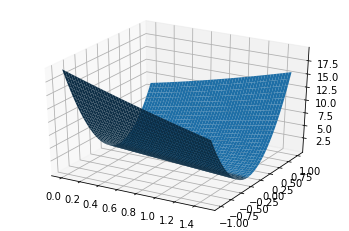

In [17]:
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')
b0=np.arange(0,1.5,0.001)
b1=np.arange(-1,1,0.001)

val=[]
val=tresDe(X,Y,b0,b1)

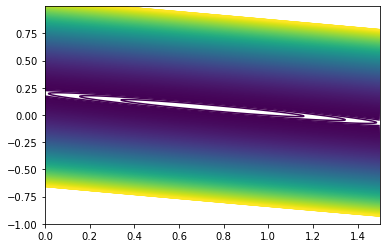

In [18]:
plt.contour(val[0],val[1],val[2],levels=np.arange(0,10,0.01))

### (b) Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


Text(0, 0.5, 'Altura (m)')

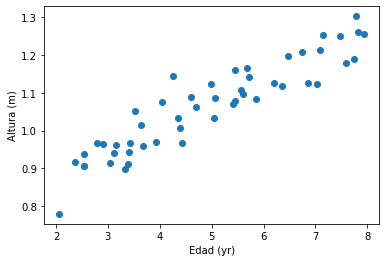

In [93]:
#Datos 
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')

plt.scatter(X,Y, label="data")
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

In [128]:
#regresión lineal
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


In [130]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(X), y=fixed(Y), rl=fixed(r), iteracion=(0,ultima_iteracion,10));

interactive(children=(IntSlider(value=590, description='iteracion', max=1189, step=10), Output()), _dom_classe…

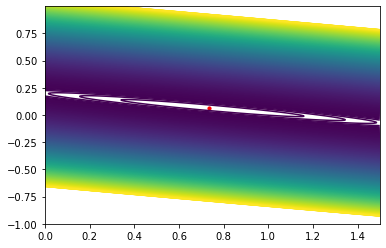

In [193]:
l=np.arange(0,10,0.01)  #Cuantos niveles se quieren
plt.contour(val[0],val[1],val[2],l)

a=r.beta[0] #Ultimo beta 0
b=r.beta[1] #ultimo beta 1

plt.scatter(a,b,10,'r')



### (c) Modifique el widget para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


In [194]:
#se crea una función para graficar los puntos en una gráfica de contorno dependiendo de la iteración en la que se encuentre
def LastIntCont(x,y,r,b0,b1,iteracion):
    
    #se usa parte de la función para sacar la gráfica de 3d
    costo=0
    B0,B1=np.meshgrid(b0,b1)
    
    for i in range(len(Y)):
        costo+=(Y[i]-B0-B1*X[i])**2/(2*len(Y))
    C=costo

    plt.contour(B0,B1,C,levels=np.arange(0,10,0.01))
    _beta = r.historia['beta'][iteracion]

    plt.scatter(_beta[0],_beta[1],10,'r')
    
    
 #se define la regresión lineal   
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

m=np.arange(0,1.5,0.001)
n=np.arange(-1,1,0.001)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(LastIntCont, x=fixed(X), y=fixed(Y), r=fixed(r),b0=fixed(m),b1=fixed(n), iteracion=(0,ultima_iteracion,10));

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


interactive(children=(IntSlider(value=590, description='iteracion', max=1189, step=10), Output()), _dom_classe…


### (d) Agrega al widget un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este widget)

In [195]:
#Se define una función para poder cambiar alpha en la regresión lineal
def alphaWid(x,y,alpha,iteracion):
    r = RegresionLineal(alpha, max_iters=10000, tols=0.0000001)
    r.gradientDescent(x, y)
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = r.historia['beta'][iteracion]
    
    #se usa parte de la función plotModelo
    
    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('edad ')
    ax[0].set_ylabel('altura')
    ax[0].legend(loc="best")
    
        
    costo  = r.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")
    
    
    
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)
interact(alphaWid, x=fixed(X), y=fixed(Y),alpha=(0.00003,0.3,0.0001), iteracion=(0,ultima_iteracion,10))


interactive(children=(FloatSlider(value=0.14993, description='alpha', max=0.3, min=3e-05, step=0.0001), IntSli…

<function __main__.alphaWid(x, y, alpha, iteracion)>

## Problema 3
### (a) Usando los datos de chirps.txt

In [199]:
import numpy as np
import matplotlib.pyplot as plt

#se importan los datos
chirps=np.loadtxt('chirps.txt')
datos=chirps[:,0]
Temp=chirps[:,1]


Entregar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?



Text(0, 0.5, 'Temp')

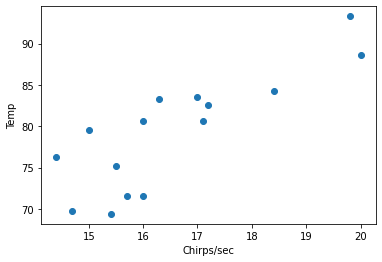

In [200]:
#se grafican los datos
plt.scatter(datos,Temp)
plt.xlabel('Chirps/sec')
plt.ylabel('Temp')

In [201]:
#se calcula la regresión lineal
r2=RegresionLineal(alpha=0.003, max_iters=1000000, tols=0)
r2.gradientDescent(datos, Temp)

La función convergió con beta: [22.84870914  3.41033933] en la iteración 383397


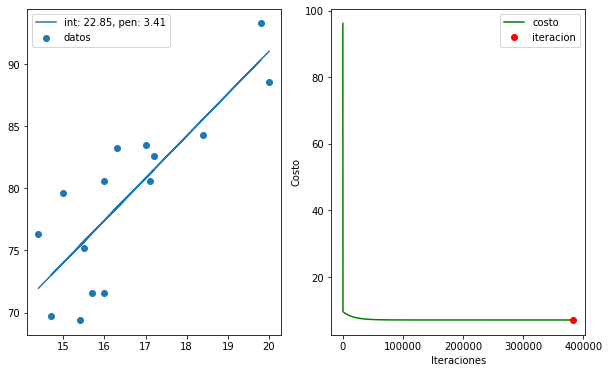

In [202]:
plotModelo(datos,Temp, r2, 383396)

Tanto beta_0 y beta_1 si coinciden a los valores que se muestran en la página web. El valor de alpha tuvo que ser modificado, ya que poniendo un valor igual a 0.03 la función no regresaba valor alguno; en cambio al disminuirlo a 0.003, la función si convergió

## Problema 4
### (a) Usando los datos del cuarteto de Anscombe Calcule la regresión lineal ¿Qué sucede?

In [204]:
#Se importan los datos
cuarteto=np.loadtxt('cuartetoA.txt')
x1=cuarteto[:,0]
y1=cuarteto[:,1]
x2=cuarteto[:,2]
y2=cuarteto[:,3]
x3=cuarteto[:,4]
y3=cuarteto[:,5]
x4=cuarteto[:,6]
y4=cuarteto[:,7]


In [206]:
#se calculan las regresiones lineales para cada conjunto de datos:

alpha=0.003
max_iters=100000
tols=0.00001

print('\nConjunto 1: ')
c1=RegresionLineal(alpha,max_iters,tols)
c1.gradientDescent(x1,y1)

print('\nConjunto 2: ')
c2=RegresionLineal(alpha,max_iters,tols)
c2.gradientDescent(x2,y2)

print('\nConjunto 3: ')
c3=RegresionLineal(alpha,max_iters,tols)
c3.gradientDescent(x3,y3)

print('\nConjunto 4: ')
c4=RegresionLineal(alpha,max_iters,tols)
c4.gradientDescent(x4,y4)



Conjunto 1: 
La función convergió con beta: [2.47231477 0.55235105] en la iteración 5240

Conjunto 2: 
La función convergió con beta: [2.47315734 0.55225772] en la iteración 5241

Conjunto 3: 
La función convergió con beta: [2.47476634 0.5519787 ] en la iteración 5243

Conjunto 4: 
La función convergió con beta: [2.47399996 0.55216439] en la iteración 5242


In [207]:
#tomando los valores de beta_0 y beta_1, se calculan conjuntos para poder graficar la recta sin la función PlotModelo
arr=np.arange(0,20,0.02)
r1=[] 
r2=[]
r3=[]
r4=[]
r1=2.47231477+0.55235105*arr
r2=2.47315734+0.55225772*arr
r3=2.47476634+0.55197873*arr
r4=2.47399996+0.55216439*arr

Text(0, 0.5, 'Y 4')

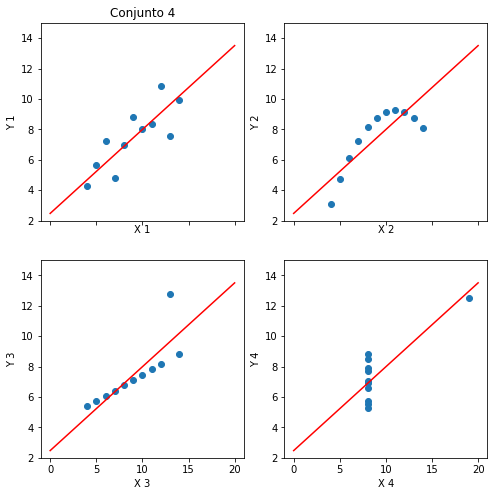

In [211]:
#Gráficas
fig,ax=plt.subplots(2,2,figsize=(8,8),sharex=True)
ax[0][0].scatter(x1,y1)
ax[0][0].plot(arr,r1,color='r')
ax[0][0].set_title('Conjunto 1')

ax[0][1].scatter(x2,y2)
ax[0][1].plot(arr,r2,color='r')
ax[0][0].set_title('Conjunto 2')

ax[1][0].scatter(x3,y3)
ax[1][0].plot(arr,r3,color='r')
ax[0][0].set_title('Conjunto 3')

ax[1][1].scatter(x4,y4)
ax[1][1].plot(arr,r4,color='r')
ax[0][0].set_title('Conjunto 4')

#Se ajustan los ejes para que sean iguales para las 4 gráficas:
ax[0][0].set_ylim(2,15)
ax[0][1].set_ylim(2,15)
ax[1][0].set_ylim(2,15)
ax[1][1].set_ylim(2,15)

#Se agregan los nombres de los ejes
ax[0][0].set_xlabel('X 1')
ax[0][1].set_xlabel('X 2')
ax[1][0].set_xlabel('X 3')
ax[1][1].set_xlabel('X 4')

ax[0][0].set_ylabel('Y 1')
ax[0][1].set_ylabel('Y 2')
ax[1][0].set_ylabel('Y 3')
ax[1][1].set_ylabel('Y 4')

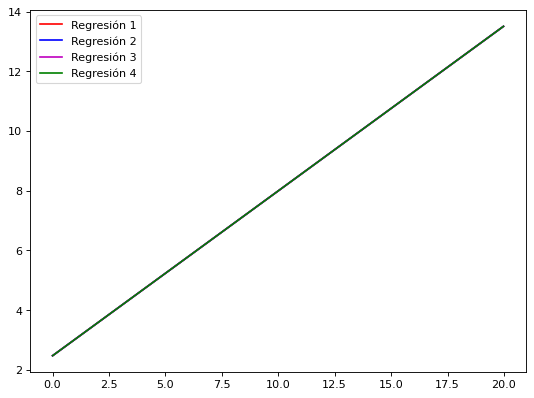

In [212]:
#Graficando en otro cuadro, vemos que las 4 rectas se contraponen entre ellas, 
#así se comprueba también que la regresión lineal es la misma

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(arr,r1,color='r',label='Regresión 1')
plt.plot(arr,r2,color='b',label='Regresión 2')
plt.plot(arr,r3,color='m',label='Regresión 3')
plt.plot(arr,r4,color='g',label='Regresión 4')
plt.legend(loc='best')

## Problema 5
### Use el archivo radioactive_decay.dat

In [213]:
#%cat radioactive_decay.txt

rad=np.loadtxt('radioactive_decay.txt')
time=rad[:,0]
N_rem=rad[:,1]

### (a) Grafique los datos ¿Qué forma tienen?



Text(0.5, 0, 'Time')

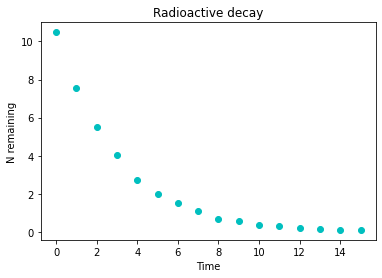

In [214]:
#Se grafican los datos obtenidos del archivo
plt.plot(time,N_rem,'co',label='original')
plt.title('Radioactive decay')
plt.ylabel('N remaining') 
plt.xlabel('Time')


Podemos observar que los datos tienen forma exponencial negativa (a^(-x))

### (b) ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado transform_radioactive_decay.txt



Text(0.5, 0, 'Time')

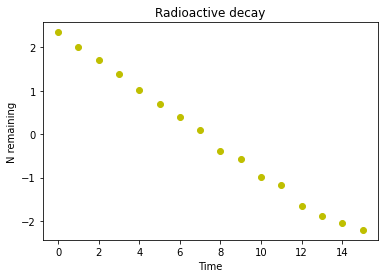

In [215]:
#Se aplica la función inversa para poder linealizar los valores
n_rem=np.log(N_rem)

out = open('transform_radioactive_decay.txt', 'w')
for element in n_rem:
    out.write(str(element))
    out.write('\n')
out.close()

transformed=np.loadtxt('transform_radioactive_decay.txt')

plt.plot(time,transformed,'oy',label='transformed')
plt.title('Radioactive decay')
plt.ylabel('N remaining') 
plt.xlabel('Time')

### (c) Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.


In [216]:
#Se crea la regresión lineal usando la clase RegresionLineal
rdt=RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
rdt.gradientDescent(time, transformed)


La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


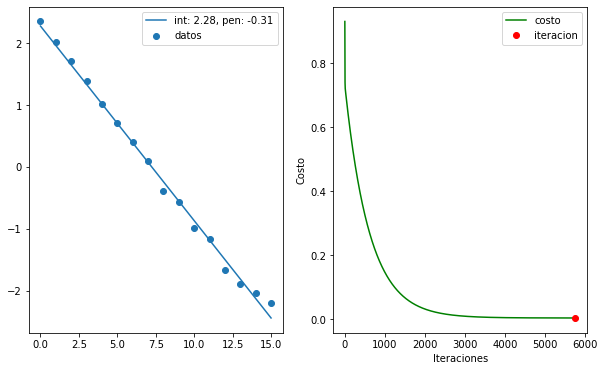

In [217]:
plotModelo(time,transformed, rdt, 5754)

### (d) ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.


Función ORIGINAL: 
La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016

Función TRANSFORMADA: 
La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


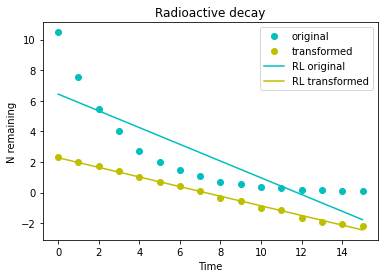

In [218]:
#Se grafican en una misma gráfica los valores de ambos archivos (original y transformado)
#También se agregan a la gráfica sus respectivas regresiones lineales. 

plt.plot(time,N_rem,'co',label='original')
plt.plot(time,transformed,'oy',label='transformed')
plt.legend(loc='best')
plt.title('Radioactive decay')
plt.ylabel('N remaining') 
plt.xlabel('Time')
print('\nFunción ORIGINAL: ')
rd=RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
rd.gradientDescent(time, N_rem)
print('\nFunción TRANSFORMADA: ')
rdt=RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
rdt.gradientDescent(time, transformed)

modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
iteracion = (rd.breaking_iteration - 1) if rd.breaking_iteration else (rd.max_iters - 1)
iteraciont= (rdt.breaking_iteration - 1) if rdt.breaking_iteration else (rdt.max_iters - 1)
_beta = rd.historia['beta'][iteracion]
_betaT = rdt.historia['beta'][iteraciont]

plt.plot(time,modelo(time, _beta[0], _beta[1]), label='RL original', color='c')
plt.plot(time,modelo(time, _betaT[0], _betaT[1]), label='RL transformed', color='y')

plt.legend(loc='best')
   

Con esta gráfica podemos observar como los valores transformados tienen una regresión lineal más efectiva, por lo que el pronóstico de los valores futuros es más acertado. El espacio sin transformar, al ser valores exponenciales no se puede dar una 
regresión lineal, por lo que es necesario transformarla. 